In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

print(train.shape, test.shape)

(13645, 22) (8745, 20)


# EDA

In [3]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [4]:
test.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [5]:
train.isnull().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

In [7]:
test.isnull().sum()

EmpID                      0
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [11]:
train.describe()

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,13150.781239,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021,75.880093
std,6475.019626,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836,14.894207
min,2001.000000,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000,33.530000
25%,7501.000000,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000,68.720000
50%,13173.000000,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000,78.110000
75%,18718.000000,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000,87.990000
max,24390.000000,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000,95.500000


In [26]:
train.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

In [30]:
cat_cols=['LanguageOfCommunication', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'BiasInfluentialFactor']

for c in cat_cols:
    print(f'{c}: {train[c].nunique()}\n')
    print(train[c].value_counts()/len(train)*100)
    print('---------------------------------------------\n')

LanguageOfCommunication: 3

English    55.038476
Hindi      34.686698
Native     10.274826
Name: LanguageOfCommunication, dtype: float64
---------------------------------------------

Gender: 3

Male      61.385123
Female    31.703921
Other      6.910956
Name: Gender, dtype: float64
---------------------------------------------

JobProfileIDApplyingFor: 9

JR85289    34.422866
JR87525    25.034811
JR88879     9.021620
JR89890     8.479296
JR88873     8.230121
JR81165     4.990839
JR79193     4.968853
JR88654     3.078051
JR70175     1.773543
Name: JobProfileIDApplyingFor, dtype: float64
---------------------------------------------

HighestDegree: 8

B.Tech         41.179919
M.Tech         14.847930
BCA            11.975082
MS             11.572004
Dual M.Tech     9.952364
Dual MBA        4.873580
PhD             4.573104
MCA             1.026017
Name: HighestDegree, dtype: float64
---------------------------------------------

DegreeBranch: 6

Computer Science              34.803957
I

In [31]:
train['BiasInfluentialFactor'].value_counts()

DegreeBranch          2858
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

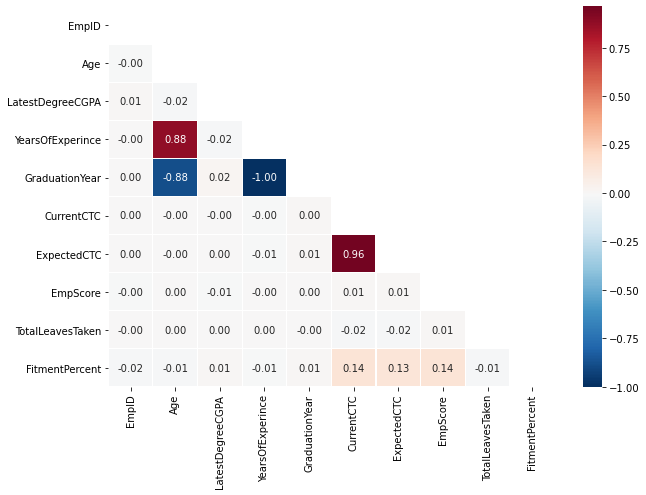

In [36]:
corrmat=train.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
plt.figure(figsize=(10,7))
sns.heatmap(corrmat, mask=mask, center=0,cmap=plt.cm.RdBu_r, linewidths=0.1,annot=True,fmt=".2f")
plt.show()

In [40]:
train.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

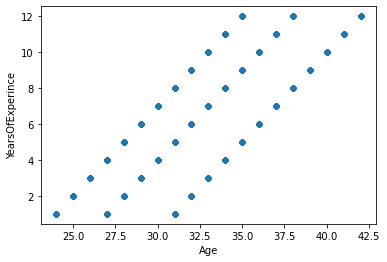

In [49]:
_ = train[['Age','YearsOfExperince']].plot(x='Age',y='YearsOfExperince',kind='scatter')

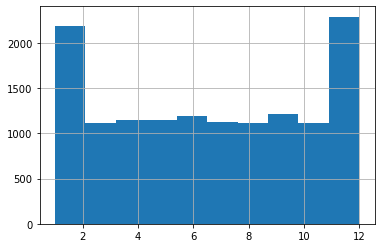

In [55]:
_=train.YearsOfExperince.hist()

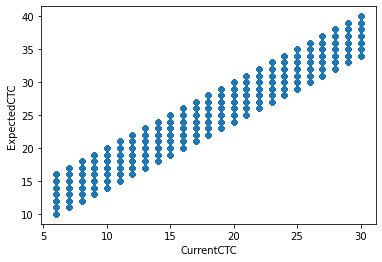

In [58]:
_=train[['ExpectedCTC','CurrentCTC']].plot(y='ExpectedCTC',x='CurrentCTC',kind='scatter')

In [78]:
[c for c in train.columns if train[c].dtype!='object']

['EmpID',
 'Age',
 'LatestDegreeCGPA',
 'YearsOfExperince',
 'GraduationYear',
 'CurrentCTC',
 'ExpectedCTC',
 'EmpScore',
 'TotalLeavesTaken',
 'FitmentPercent']

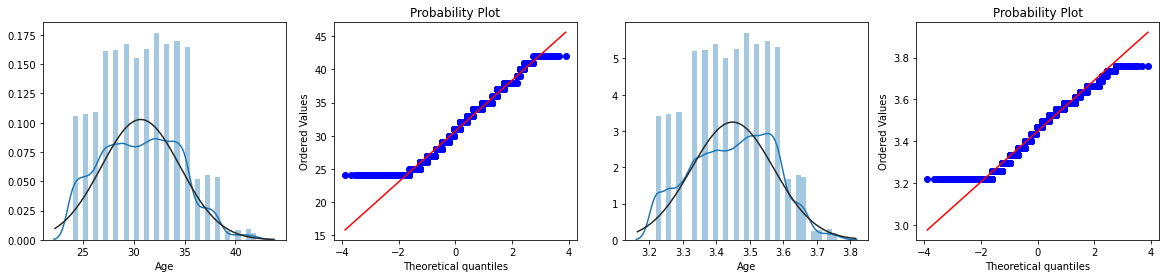

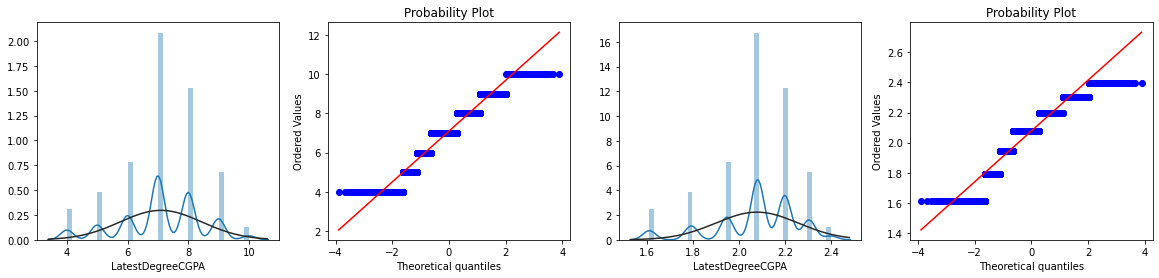

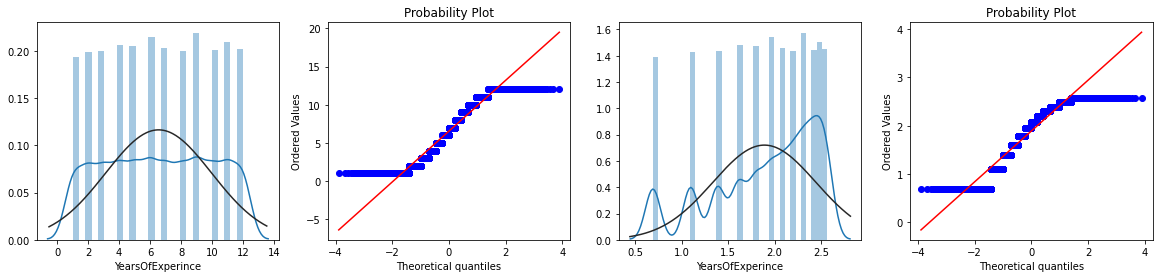

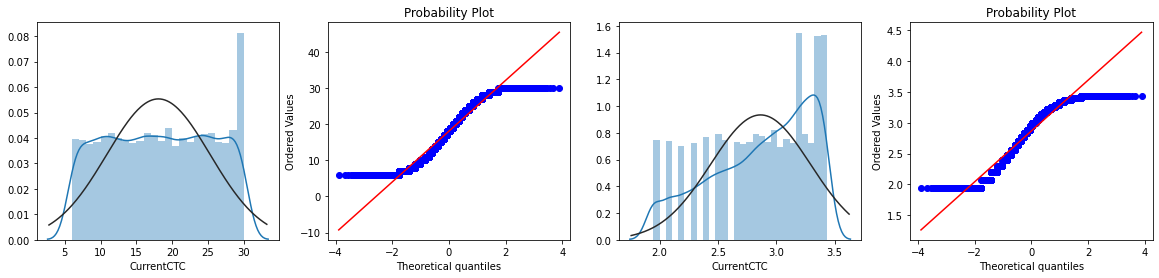

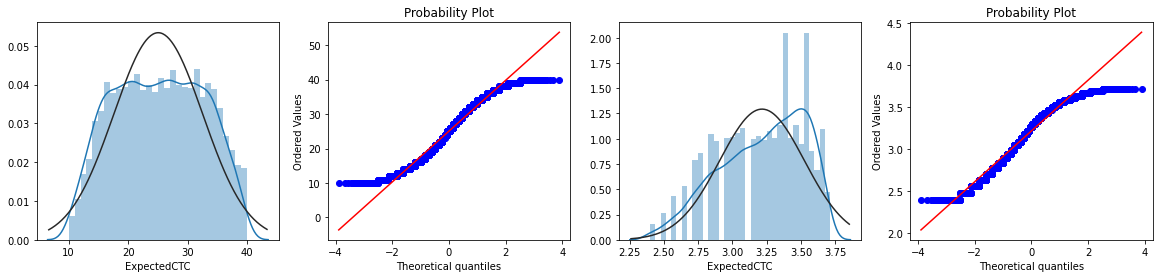

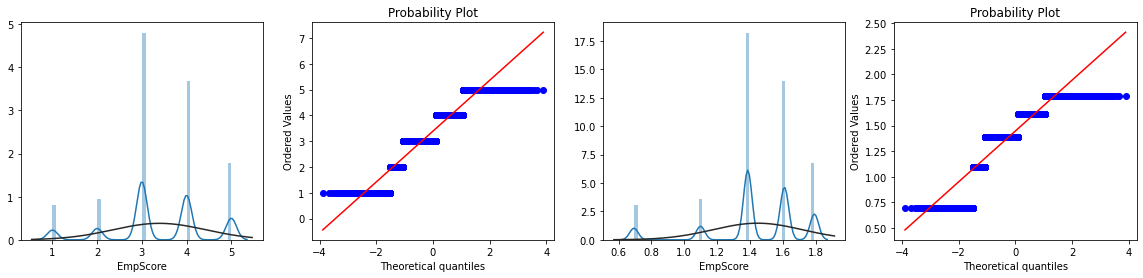

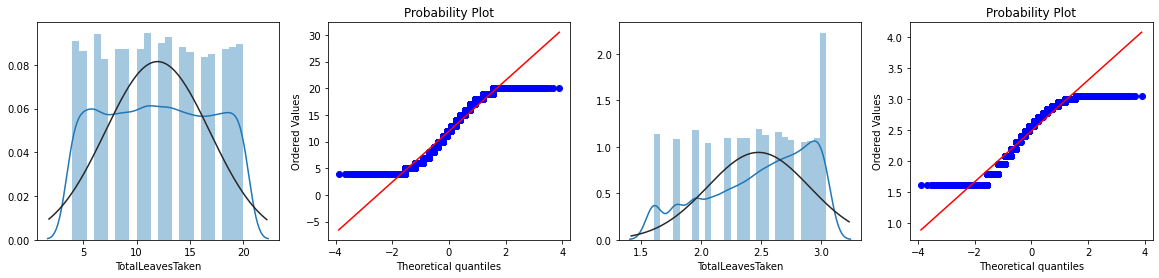

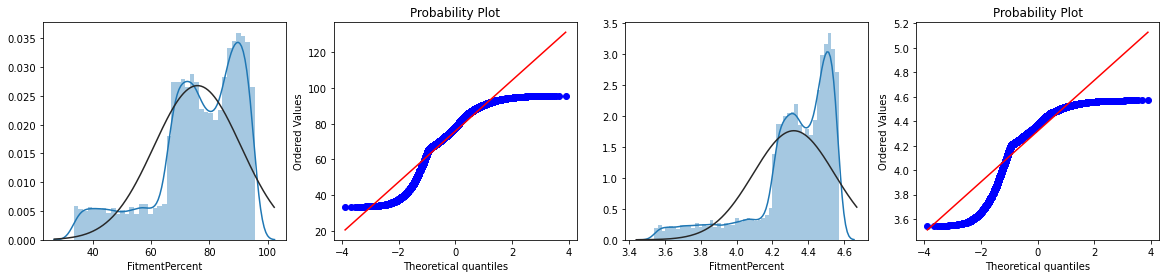

In [83]:
import scipy

for c in ['Age','LatestDegreeCGPA','YearsOfExperince','CurrentCTC','ExpectedCTC','EmpScore',
 'TotalLeavesTaken', 'FitmentPercent']:
    plt.figure(figsize=(20,4))
    plt.subplot(1,4, 1)
    sns.distplot(train[c], fit=scipy.stats.norm)
    plt.subplot(1,4,2)
    _ = scipy.stats.probplot(train[c],plot=plt)
    plt.subplot(1,4, 3)
    sns.distplot(np.log1p(train[c]), fit=scipy.stats.norm)
    plt.subplot(1,4,4)
    _ = scipy.stats.probplot(np.log1p(train[c]),plot=plt)

# feature preprocessing

In [32]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [33]:
train.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [91]:
print(train.shape)

train1 = train[[ 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'CurrentCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']].copy()
print(train1.shape)

train1['GraduatingInstitute'] = train['GraduatingInstitute'].map({'Tier 1':3,'Tier 2':2, 'Tier 3':1})
train1['ExpectedHike'] = (train['ExpectedCTC']-train['CurrentCTC'])/train['CurrentCTC']*100
print(train1.shape)
train1.head()

(13645, 22)
(13645, 16)
(13645, 17)


,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,ExpectedHike
0,English,35,Male,JR85289,B.Tech,Electrical,3,7,12,21,Married,5,SSE,Enterprise,Design,20,23.809524
1,English,26,Male,JR87525,B.Tech,Artificial Intelligence,1,7,3,15,Married,5,BA,MidSized,Engineering,6,26.666667
2,English,36,Female,JR87525,PhD,Computer Science,3,6,6,15,Single,5,SDE,MidSized,Engineering,19,60.000000
3,English,29,Female,JR87525,BCA,Information Technology,2,5,6,16,Married,5,SDE,Startup,Product,16,50.000000
4,English,25,Male,JR70175,Dual M.Tech,Computer Science,1,8,2,24,Married,5,SDE,Enterprise,Engineering,10,33.333333


In [77]:
target_col = train['BiasInfluentialFactor'].fillna('Unknown')
target_col.head()

0    YearsOfExperince
1             Unknown
2              Gender
3              Gender
4        DegreeBranch
Name: BiasInfluentialFactor, dtype: object

# Creating X and Y

In [92]:
X = pd.get_dummies(train1, drop_first=True)
y = target_col.copy()
print(X.shape,y.shape)

(13645, 46) (13645,)


In [93]:
X.iloc[0,:]

Age                                        35.000000
GraduatingInstitute                         3.000000
LatestDegreeCGPA                            7.000000
YearsOfExperince                           12.000000
CurrentCTC                                 21.000000
EmpScore                                    5.000000
TotalLeavesTaken                           20.000000
ExpectedHike                               23.809524
LanguageOfCommunication_Hindi               0.000000
LanguageOfCommunication_Native              0.000000
Gender_Male                                 1.000000
Gender_Other                                0.000000
JobProfileIDApplyingFor_JR79193             0.000000
JobProfileIDApplyingFor_JR81165             0.000000
JobProfileIDApplyingFor_JR85289             1.000000
JobProfileIDApplyingFor_JR87525             0.000000
JobProfileIDApplyingFor_JR88654             0.000000
JobProfileIDApplyingFor_JR88873             0.000000
JobProfileIDApplyingFor_JR88879             0.

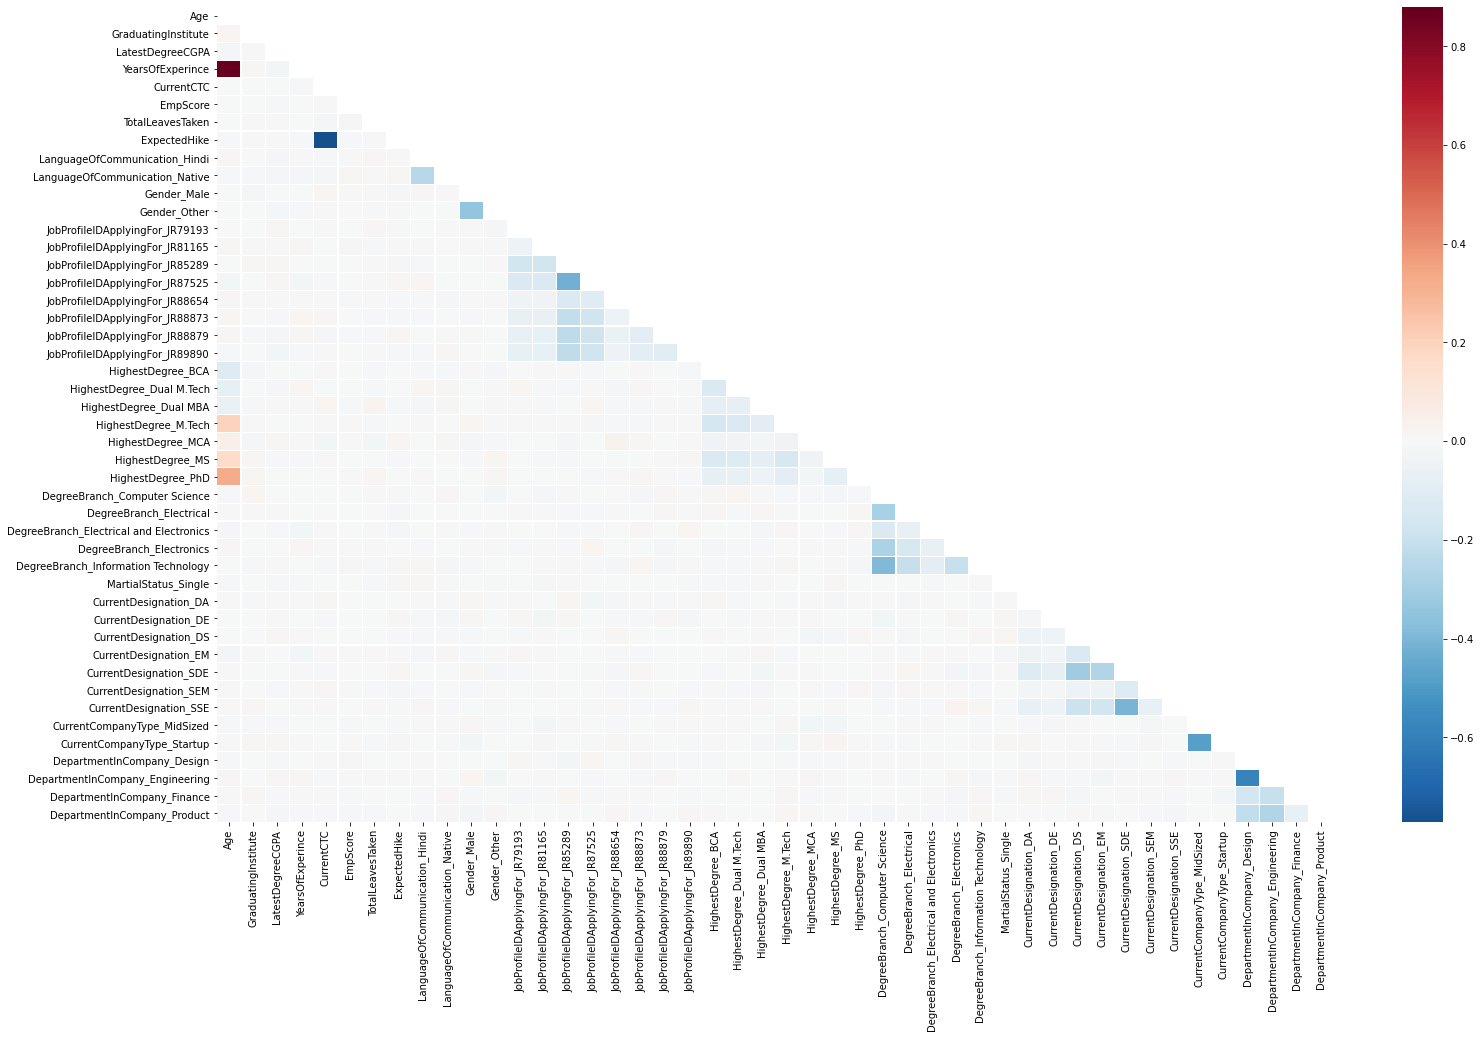

In [94]:
corrmat=X.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
plt.figure(figsize=(25,15))
sns.heatmap(corrmat, mask=mask, center=0,cmap=plt.cm.RdBu_r, linewidths=0.1,annot=False,fmt=".2f")
plt.show()

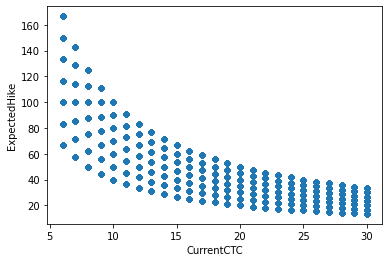

In [95]:
_=X.plot(kind='scatter',x='CurrentCTC', y='ExpectedHike')

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["vif"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values(by='vif', ascending=False)

,feature,vif
0,Age,318.789370
3,YearsOfExperince,25.701566
14,JobProfileIDApplyingFor_JR85289,13.421235
15,JobProfileIDApplyingFor_JR87525,11.360613
18,JobProfileIDApplyingFor_JR88879,5.551832
19,JobProfileIDApplyingFor_JR89890,5.308811
17,JobProfileIDApplyingFor_JR88873,5.190074
13,JobProfileIDApplyingFor_JR81165,3.633685
12,JobProfileIDApplyingFor_JR79193,3.623928
43,DepartmentInCompany_Engineering,2.705976
